In [2]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 12.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
import yfinance as yf
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = yf.download("GC=F", start='2021-07-22', end='2022-07-22')
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-22,1793.599976,1805.000000,1793.599976,1805.000000,1805.000000,2
2021-07-23,1800.000000,1801.400024,1800.000000,1801.400024,1801.400024,1
2021-07-26,1802.500000,1802.500000,1797.199951,1798.699951,1798.699951,17
2021-07-27,1803.699951,1803.699951,1799.500000,1799.500000,1799.500000,1
2021-07-28,1799.500000,1799.500000,1799.500000,1799.500000,1799.500000,209783
...,...,...,...,...,...,...
2022-07-15,1705.400024,1709.699951,1701.099976,1702.400024,1702.400024,721
2022-07-18,1712.199951,1712.400024,1709.199951,1709.199951,1709.199951,264
2022-07-19,1712.300049,1714.400024,1706.099976,1710.000000,1710.000000,1684


In [5]:

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-07-22,-11.400024,11.400024
2021-07-23,-1.400024,1.400024
2021-07-26,3.800049,5.300049
2021-07-27,4.199951,4.199951
2021-07-28,0.000000,0.000000


In [6]:

# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [7]:

split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [8]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)


In [9]:

df['Predicted_Signal'] = cls.predict(X)
df['Predicted_Signal']

Date
2021-07-22    1
2021-07-23    0
2021-07-26    1
2021-07-27    0
2021-07-28    0
             ..
2022-07-15    1
2022-07-18    0
2022-07-19    1
2022-07-20    1
2022-07-21    1
Name: Predicted_Signal, Length: 253, dtype: int64

In [10]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()
df['Return']

Date
2021-07-22         NaN
2021-07-23   -0.001994
2021-07-26   -0.001499
2021-07-27    0.000445
2021-07-28    0.000000
                ...   
2022-07-15   -0.001232
2022-07-18    0.003994
2022-07-19    0.000468
2022-07-20   -0.006140
2022-07-21    0.007767
Name: Return, Length: 253, dtype: float64

In [11]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Strategy_Return']

Date
2021-07-22         NaN
2021-07-23   -0.001994
2021-07-26   -0.000000
2021-07-27    0.000445
2021-07-28    0.000000
                ...   
2022-07-15   -0.001232
2022-07-18    0.003994
2022-07-19    0.000000
2022-07-20   -0.006140
2022-07-21    0.007767
Name: Strategy_Return, Length: 253, dtype: float64

In [12]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2021-07-22,1793.599976,1805.000000,1793.599976,1805.000000,1805.000000,2,-11.400024,11.400024,1,NaN,NaN,NaN
2021-07-23,1800.000000,1801.400024,1800.000000,1801.400024,1801.400024,1,-1.400024,1.400024,0,-0.001994,-0.001994,-0.001994
2021-07-26,1802.500000,1802.500000,1797.199951,1798.699951,1798.699951,17,3.800049,5.300049,1,-0.001499,-0.000000,-0.003493
2021-07-27,1803.699951,1803.699951,1799.500000,1799.500000,1799.500000,1,4.199951,4.199951,0,0.000445,0.000445,-0.003049
2021-07-28,1799.500000,1799.500000,1799.500000,1799.500000,1799.500000,209783,0.000000,0.000000,0,0.000000,0.000000,-0.003049
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,1705.400024,1709.699951,1701.099976,1702.400024,1702.400024,721,3.000000,8.599976,1,-0.001232,-0.001232,-0.047716
2022-07-18,1712.199951,1712.400024,1709.199951,1709.199951,1709.199951,264,3.000000,3.200073,0,0.003994,0.003994,-0.043721
2022-07-19,1712.300049,1714.400024,1706.099976,1710.000000,1710.000000,1684,2.300049,8.300049,1,0.000468,0.000000,-0.043253


In [13]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2021-07-22,1793.599976,1805.000000,1793.599976,1805.000000,1805.000000,2,-11.400024,11.400024,1,NaN,NaN,NaN,NaN
2021-07-23,1800.000000,1801.400024,1800.000000,1801.400024,1801.400024,1,-1.400024,1.400024,0,-0.001994,-0.001994,-0.001994,-0.001994
2021-07-26,1802.500000,1802.500000,1797.199951,1798.699951,1798.699951,17,3.800049,5.300049,1,-0.001499,-0.000000,-0.003493,-0.001994
2021-07-27,1803.699951,1803.699951,1799.500000,1799.500000,1799.500000,1,4.199951,4.199951,0,0.000445,0.000445,-0.003049,-0.001550
2021-07-28,1799.500000,1799.500000,1799.500000,1799.500000,1799.500000,209783,0.000000,0.000000,0,0.000000,0.000000,-0.003049,-0.001550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,1705.400024,1709.699951,1701.099976,1702.400024,1702.400024,721,3.000000,8.599976,1,-0.001232,-0.001232,-0.047716,0.068513
2022-07-18,1712.199951,1712.400024,1709.199951,1709.199951,1709.199951,264,3.000000,3.200073,0,0.003994,0.003994,-0.043721,0.072508
2022-07-19,1712.300049,1714.400024,1706.099976,1710.000000,1710.000000,1684,2.300049,8.300049,1,0.000468,0.000000,-0.043253,0.072508


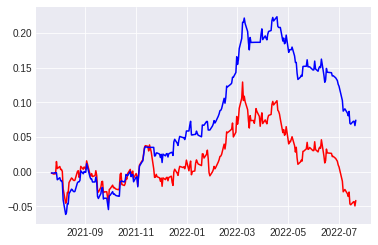

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')